In [153]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [154]:
books=pd.read_csv('data/Books.csv')
users=pd.read_csv('data/Users.csv')
ratings=pd.read_csv('data/Ratings.csv')

C:\Users\adminn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [155]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [156]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [157]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [158]:
print('shape of books data is {}'.format(books.shape))
print('shape of users data is {}'.format(users.shape))
print('shape of ratings data is {}'.format(ratings.shape))


shape of books data is (271360, 8)
shape of users data is (278858, 3)
shape of ratings data is (1149780, 3)


## Missing values

In [159]:
def missing_values(df):
    miss_total=df.isnull().sum().sort_values(ascending=False)
    miss_percent=(df.isnull().sum()/len(df)).sort_values(ascending=False)
    missing_data=pd.concat([miss_total,miss_percent],keys=['total_miss_val','percent_miss_val'],axis=1)
    return missing_data

In [160]:
missing_books=missing_values(books)
missing_books

,total_miss_val,percent_miss_val
Image-URL-L,3,0.000011
Publisher,2,0.000007
Book-Author,1,0.000004
ISBN,0,0.000000
Book-Title,0,0.000000
Year-Of-Publication,0,0.000000
Image-URL-S,0,0.000000
Image-URL-M,0,0.000000


In [161]:
missing_users=missing_values(users)
missing_users

,total_miss_val,percent_miss_val
Age,110762,0.397199
User-ID,0,0.000000
Location,0,0.000000


In [162]:
missing_ratings=missing_values(ratings)
missing_ratings

,total_miss_val,percent_miss_val
User-ID,0,0.0
ISBN,0,0.0
Book-Rating,0,0.0


# EDA

In [163]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [164]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [165]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [166]:
books['Year-Of-Publication'].unique()
# first remark is that we have some name of publisher in our column of year publication.

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [167]:
books[books['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [168]:
books.loc[books.ISBN=='0789466953','Year-Of-Publication']=2000
books.loc[books.ISBN=='0789466953','Book-Author']='James Buckley'
books.loc[books.ISBN=='0789466953','Year-Of-Publication']=2000
books.loc[books.ISBN=='0789466953','Publisher']='DK Publishing Inc'
books.loc[books.ISBN=='0789466953','Book-Title']="DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"


books.loc[books.ISBN=='078946697X','Year-Of-Publication']=2000
books.loc[books.ISBN=='078946697X','Book-Author']='Michael Teitelbaum'
books.loc[books.ISBN=='078946697X','Publisher']='DK Publishing Inc'
books.loc[books.ISBN=='078946697X','Book-Title']='DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'



In [169]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [170]:
books[books['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [171]:
books.loc[books.ISBN=='2070426769	','Year-Of-Publication']=2003
books.loc[books.ISBN=='2070426769	','Book-Author']='Jean-Marie Gustave'
books.loc[books.ISBN=='2070426769	','Publisher']='Gallimard'
books.loc[books.ISBN=='2070426769	','Book-Title']='Peuple du ciel, suivi de Les Bergers'



In [172]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'],errors='coerce')


In [173]:
books['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,    0., 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 2030., 1911., 1904., 1949., 1932.,
       1928., 1929., 1927., 1931., 1914., 2050., 1934., 1910., 1933.,
       1902., 1924., 1921., 1900., 2038., 2026., 1944., 1917., 1901.,
       2010., 1908., 1906., 1935., 1806., 2021., 2012., 2006.,   nan,
       1909., 2008., 1378., 1919., 1922., 1897., 2024., 1376., 2037.])

### Remarks :

- Since our data was published in 2004, we assume that years after 2006 are invalid
- We will sit invalid data as NaN


In [177]:
books['Year-Of-Publication'].isnull().sum()

0

In [175]:
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

In [176]:
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()),inplace=True)

In [178]:
books['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984., 1968., 1961., 1958., 1974., 1976., 1971., 1977., 1975.,
       1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966., 1920.,
       1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969., 1954.,
       1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946., 1936.,
       1930., 1925., 1948., 1943., 1947., 1945., 1923., 1939., 1926.,
       1938., 1911., 1904., 1949., 1932., 1928., 1929., 1927., 1931.,
       1914., 1934., 1910., 1933., 1902., 1924., 1921., 1900., 1944.,
       1917., 1901., 1908., 1906., 1935., 1806., 2006., 1909., 1378.,
       1919., 1922., 1897., 1376.])

In [179]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype(np.int32)

Text(0.5, 1.0, 'Year of Publication')

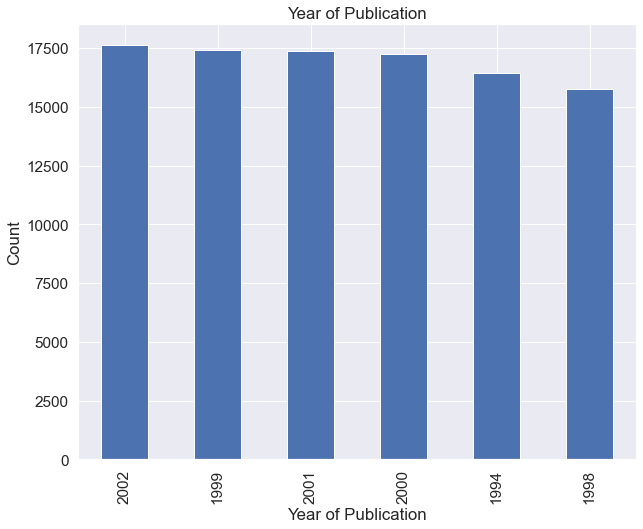

In [195]:
sns.set(font_scale=1.4)

books['Year-Of-Publication'].value_counts()[:6].plot(kind='bar',figsize=(10,8),
                                                  xlabel='Year of Publication',
                                                  ylabel='Count')
plt.title('Year of Publication')

### Publisher column

In [180]:
books.loc[books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [181]:
books.loc[(books.ISBN == '193169656X'),'Publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'Publisher'] = 'other'

Text(0.5, 1.0, 'Publisher')

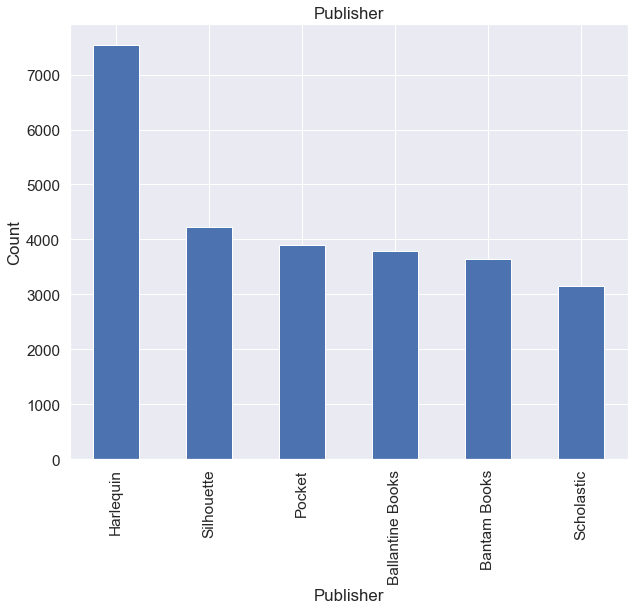

In [196]:
sns.set(font_scale= 1.4)
books['Publisher'].value_counts()[:6].plot(kind='bar', figsize=(10,8), 
                                                      xlabel='Publisher', 
                                                      ylabel='Count')

plt.title("Publisher")

### Users

In [184]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


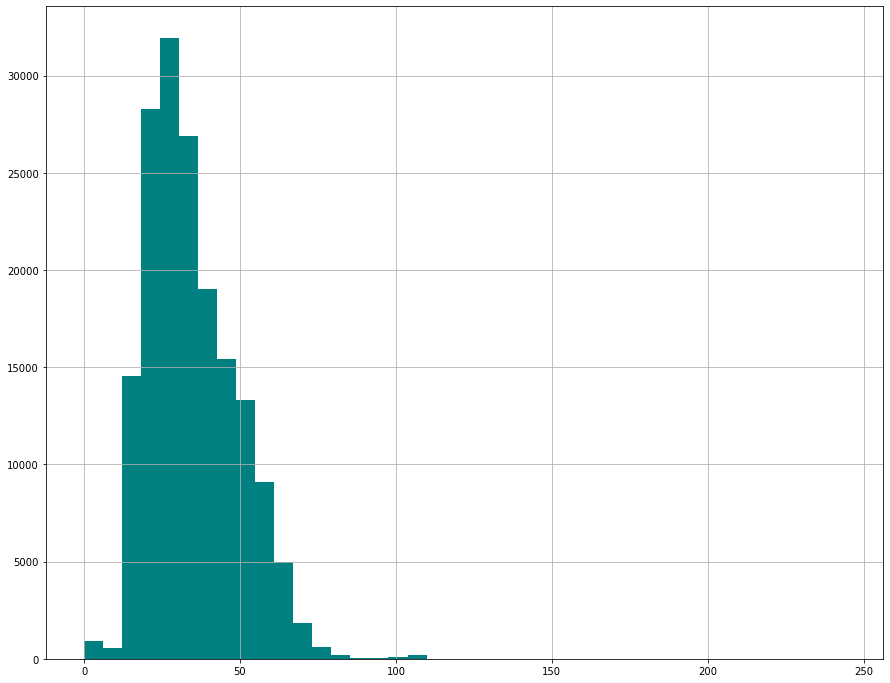

In [191]:
plt.figure(figsize=(15,12))
users.Age.hist(bins=40, color='teal')
plt.show()

## Remarks : 

- I think we should remove values below 5 and above 90 because i don't make much sens

In [192]:
users.loc[(users.Age>90) | (users.Age<5),'Age']=np.NaN

users.Age=users.Age.fillna(users.Age.mean())

users.Age=users.Age.astype(np.int32)